In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [6]:
df = pd.read_csv('./Resources/monsters.csv')
pd.set_option('display.max_columns', None)
df.head()


,Unnamed: 0,_id,index,name,size,type,subtype,alignment,armor_class,hit_points,hit_dice,speed,strength,dexterity,constitution,intelligence,wisdom,charisma,proficiencies,damage_vulnerabilities,damage_resistances,damage_immunities,condition_immunities,senses,languages,challenge_rating,special_abilities,actions,legendary_actions,url,reactions,other_speeds
0,0,5f2329ad0b1bb138c59411ee,aboleth,Aboleth,Large,aberration,NaN,lawful evil,17,135,18d10,"{'walk': '10 ft.', 'swim': '40 ft.'}",21,9,15,18,15,18,"[{'name': 'Saving Throw: CON', 'url': '/api/pr...",[],[],[],[],"{'darkvision': '120 ft.', 'passive_perception'...","Deep Speech, telepathy 120 ft.",10.00,"[{'name': 'Amphibious', 'desc': 'The aboleth c...","[{'name': 'Multiattack', 'desc': 'The aboleth ...","[{'name': 'Detect', 'desc': 'The aboleth makes...",/api/monsters/aboleth,NaN,NaN
1,1,5f2329ad0b1bb138c59411ef,acolyte,Acolyte,Medium,humanoid,any race,any alignment,10,9,2d8,{'walk': '30 ft.'},10,10,10,10,14,11,"[{'name': 'Skill: Medicine', 'url': '/api/prof...",[],[],[],[],{'passive_perception': 12},any one language (usually Common),0.25,"[{'name': 'Spellcasting', 'desc': 'The acolyte...","[{'name': 'Club', 'desc': 'Melee Weapon Attack...",NaN,/api/monsters/acolyte,NaN,NaN
2,2,5f2329ad0b1bb138c59411f1,adult-black-dragon,Adult Black Dragon,Huge,dragon,NaN,chaotic evil,19,195,17d12,"{'walk': '40 ft.', 'fly': '80 ft.', 'swim': '4...",23,14,21,14,13,17,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",[],[],['acid'],[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",14.00,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/monsters/adult-black-dragon,NaN,NaN
3,3,5f2329ad0b1bb138c59411f0,adult-blue-dragon,Adult Blue Dragon,Huge,dragon,NaN,lawful evil,19,225,18d12,"{'walk': '40 ft.', 'burrow': '30 ft.', 'fly': ...",25,10,23,16,15,19,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",[],[],['lightning'],[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",16.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",/api/monsters/adult-blue-dragon,NaN,NaN
4,4,5f2329ad0b1bb138c59411f2,adult-brass-dragon,Adult Brass Dragon,Huge,dragon,NaN,chaotic good,18,172,15d12,"{'walk': '40 ft.', 'burrow': '40 ft.', 'fly': ...",23,10,21,14,13,17,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",[],[],['fire'],[],"{'blindsight': '60 ft.', 'darkvision': '120 ft...","Common, Draconic",13.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...",NaN,/api/monsters/adult-brass-dragon,NaN,NaN


In [7]:
df.shape

(322, 32)

In [8]:
df.columns

Index(['Unnamed: 0', '_id', 'index', 'name', 'size', 'type', 'subtype',
       'alignment', 'armor_class', 'hit_points', 'hit_dice', 'speed',
       'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom',
       'charisma', 'proficiencies', 'damage_vulnerabilities',
       'damage_resistances', 'damage_immunities', 'condition_immunities',
       'senses', 'languages', 'challenge_rating', 'special_abilities',
       'actions', 'legendary_actions', 'url', 'reactions', 'other_speeds'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              322 non-null    int64  
 1   _id                     322 non-null    object 
 2   index                   322 non-null    object 
 3   name                    322 non-null    object 
 4   size                    322 non-null    object 
 5   type                    322 non-null    object 
 6   subtype                 64 non-null     object 
 7   alignment               322 non-null    object 
 8   armor_class             322 non-null    int64  
 9   hit_points              322 non-null    int64  
 10  hit_dice                322 non-null    object 
 11  speed                   322 non-null    object 
 12  strength                322 non-null    int64  
 13  dexterity               322 non-null    int64  
 14  constitution            322 non-null    in

Text(0.5, 1.0, 'CR (Challenge Rating) Overall Counts')

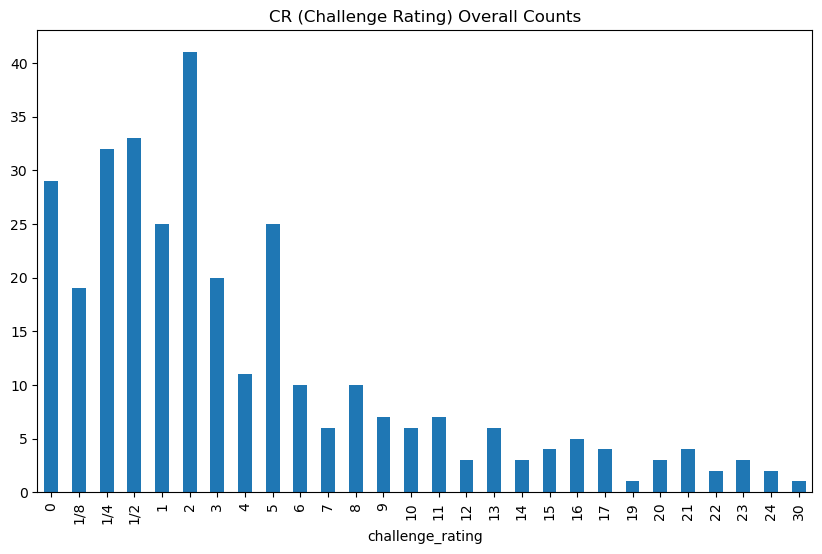

In [10]:
data = df['challenge_rating']
data = data.sort_values()
data = data.astype(str)
data = data.str.replace('0.5', '1/2')
data = data.str.replace('0.25', '1/4')
data = data.str.replace('0.125', '1/8')
data = data.str.replace('.0', '')

plt.figure(figsize=(10,6))
data.value_counts()[data.unique()].plot(kind='bar')
plt.title("CR (Challenge Rating) Overall Counts")

Text(0.5, 1.0, 'Monster size distribution')

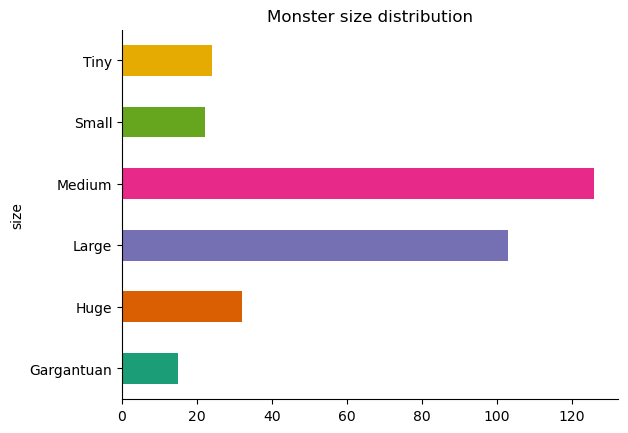

In [11]:
df.groupby('size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Monster size distribution")

Text(0.5, 1.0, 'Average HP per type')

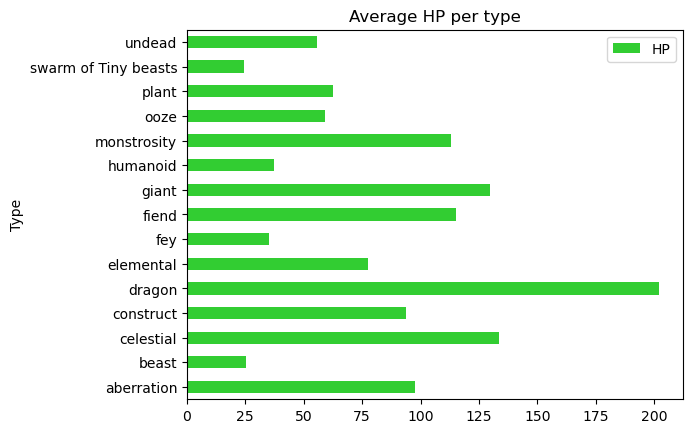

In [12]:
hp = df['hit_points']
monster_type = df['type']
type_hp = pd.DataFrame({'HP': hp, 'Type': monster_type})
mean_type_hp = type_hp.groupby(['Type']).mean()

mean_type_hp.plot(kind='barh', color='limegreen')
plt.title('Average HP per type')

In [13]:
df = df[['name', 'size', 'type', 'alignment', 'armor_class', 'hit_points', 'hit_dice', 'speed',
       'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom',
       'charisma', 'proficiencies', 'damage_vulnerabilities',
       'damage_resistances', 'damage_immunities', 'condition_immunities',
       'senses', 'challenge_rating', 'special_abilities',
       'actions', 'legendary_actions', 'reactions', 'other_speeds']]
df.replace('[]', np.nan, inplace=True)
df.head()

,name,size,type,alignment,armor_class,hit_points,hit_dice,speed,strength,dexterity,constitution,intelligence,wisdom,charisma,proficiencies,damage_vulnerabilities,damage_resistances,damage_immunities,condition_immunities,senses,challenge_rating,special_abilities,actions,legendary_actions,reactions,other_speeds
0,Aboleth,Large,aberration,lawful evil,17,135,18d10,"{'walk': '10 ft.', 'swim': '40 ft.'}",21,9,15,18,15,18,"[{'name': 'Saving Throw: CON', 'url': '/api/pr...",NaN,NaN,NaN,NaN,"{'darkvision': '120 ft.', 'passive_perception'...",10.00,"[{'name': 'Amphibious', 'desc': 'The aboleth c...","[{'name': 'Multiattack', 'desc': 'The aboleth ...","[{'name': 'Detect', 'desc': 'The aboleth makes...",NaN,NaN
1,Acolyte,Medium,humanoid,any alignment,10,9,2d8,{'walk': '30 ft.'},10,10,10,10,14,11,"[{'name': 'Skill: Medicine', 'url': '/api/prof...",NaN,NaN,NaN,NaN,{'passive_perception': 12},0.25,"[{'name': 'Spellcasting', 'desc': 'The acolyte...","[{'name': 'Club', 'desc': 'Melee Weapon Attack...",NaN,NaN,NaN
2,Adult Black Dragon,Huge,dragon,chaotic evil,19,195,17d12,"{'walk': '40 ft.', 'fly': '80 ft.', 'swim': '4...",23,14,21,14,13,17,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",NaN,NaN,['acid'],NaN,"{'blindsight': '60 ft.', 'darkvision': '120 ft...",14.00,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",NaN,NaN
3,Adult Blue Dragon,Huge,dragon,lawful evil,19,225,18d12,"{'walk': '40 ft.', 'burrow': '30 ft.', 'fly': ...",25,10,23,16,15,19,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",NaN,NaN,['lightning'],NaN,"{'blindsight': '60 ft.', 'darkvision': '120 ft...",16.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",NaN,NaN
4,Adult Brass Dragon,Huge,dragon,chaotic good,18,172,15d12,"{'walk': '40 ft.', 'burrow': '40 ft.', 'fly': ...",23,10,21,14,13,17,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",NaN,NaN,['fire'],NaN,"{'blindsight': '60 ft.', 'darkvision': '120 ft...",13.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...",NaN,NaN,NaN


In [14]:
import sqlite3
import pandas as pd

# Connect to SQLite database (or create one)
conn = sqlite3.connect('monsters.db')

# Load DataFrame into SQL
df.to_sql('monsters_table', conn, if_exists='replace', index=False)

322

In [19]:
df = df[['name', 'size', 'type', 'alignment', 'armor_class', 'hit_points', 'hit_dice', 'speed',
       'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom',
       'charisma', 'proficiencies', 'damage_vulnerabilities',
       'damage_resistances', 'damage_immunities', 'condition_immunities',
       'senses', 'challenge_rating', 'special_abilities',
       'actions', 'legendary_actions', 'reactions', 'other_speeds']]
df.replace('[]', np.nan, inplace=True)
df.head()

# Connect to an SQLite database
# Load the cleaned DataFrame into a SQL table
table_name = 'monsters'
df.to_sql(table_name, conn, if_exists='replace', index=False)

print(f"Data loaded into SQL table '{table_name}' successfully!")

Data loaded into SQL table 'monsters' successfully!


In [20]:
# Query the database to verify
query = f"SELECT * FROM {table_name} LIMIT 5"
result = pd.read_sql_query(query, conn)
print(result)

# Close the connection when done
conn.close()

                 name    size        type      alignment  armor_class  \
0             Aboleth   Large  aberration    lawful evil           17   
1             Acolyte  Medium    humanoid  any alignment           10   
2  Adult Black Dragon    Huge      dragon   chaotic evil           19   
3   Adult Blue Dragon    Huge      dragon    lawful evil           19   
4  Adult Brass Dragon    Huge      dragon   chaotic good           18   

   hit_points hit_dice                                              speed  \
0         135    18d10               {'walk': '10 ft.', 'swim': '40 ft.'}   
1           9      2d8                                 {'walk': '30 ft.'}   
2         195    17d12  {'walk': '40 ft.', 'fly': '80 ft.', 'swim': '4...   
3         225    18d12  {'walk': '40 ft.', 'burrow': '30 ft.', 'fly': ...   
4         172    15d12  {'walk': '40 ft.', 'burrow': '40 ft.', 'fly': ...   

   strength  dexterity  constitution  intelligence  wisdom  charisma  \
0        21          9    

In [21]:
# Connect to the SQLite database
def connect_to_db(db_name):
    return sqlite3.connect(db_name)

# Query 1: Get the summary statistics of numeric columns
def get_summary_statistics(conn, table_name):
    query = f"""
    SELECT
        AVG(hit_points) AS avg_hp,
        MAX(hit_points) AS max_hp,
        MIN(hit_points) AS min_hp,
        AVG(armor_class) AS avg_ac,
        MAX(armor_class) AS max_ac,
        MIN(armor_class) AS min_ac
    FROM {table_name};
    """
    return pd.read_sql_query(query, conn)

# Query 2: Count the number of monsters by type
def count_monsters_by_type(conn, table_name):
    query = f"""
    SELECT type, COUNT(*) AS monster_count
    FROM {table_name}
    GROUP BY type
    ORDER BY monster_count DESC;
    """
    return pd.read_sql_query(query, conn)

# Query 3: Get the distribution of challenge ratings
def get_cr_distribution(conn, table_name):
    query = f"""
    SELECT challenge_rating, COUNT(*) AS count
    FROM {table_name}
    GROUP BY challenge_rating
    ORDER BY challenge_rating;
    """
    return pd.read_sql_query(query, conn)

# Query 4: Find monsters with the highest HP
def get_top_hp_monsters(conn, table_name, top_n=10):
    query = f"""
    SELECT name, hit_points, type, armor_class, challenge_rating
    FROM {table_name}
    ORDER BY hit_points DESC
    LIMIT {top_n};
    """
    return pd.read_sql_query(query, conn)

# Query 5: Filter monsters by specific criteria (e.g., type and CR range)
def filter_monsters(conn, table_name, monster_type, min_cr, max_cr):
    query = f"""
    SELECT name, type, challenge_rating, armor_class, hit_points
    FROM {table_name}
    WHERE type = '{monster_type}' AND challenge_rating BETWEEN {min_cr} AND {max_cr}
    ORDER BY challenge_rating;
    """
    return pd.read_sql_query(query, conn)

# Main Execution
if __name__ == "__main__":
    db_name = 'dnd_monsters.db'
    table_name = 'monsters' 
    
    # Establish connection
    conn = connect_to_db(db_name)

    # Execute queries and display results
    print("Summary Statistics:")
    print(get_summary_statistics(conn, table_name))

    print("\nCount of Monsters by Type:")
    print(count_monsters_by_type(conn, table_name))

    print("\nChallenge Rating Distribution:")
    print(get_cr_distribution(conn, table_name))

    print("\nTop 10 Monsters by HP:")
    print(get_top_hp_monsters(conn, table_name))

    print("\nFiltered Monsters (Type: Dragon, CR between 10 and 20):")
    print(filter_monsters(conn, table_name, 'dragon', 10, 20))

    # Close the database connection
    conn.close()

Summary Statistics:
      avg_hp  max_hp  min_hp     avg_ac  max_ac  min_ac
0  81.291925     676       1  14.031056      25       5

Count of Monsters by Type:
                    type  monster_count
0                  beast             87
1                 dragon             43
2               humanoid             40
3            monstrosity             39
4                  fiend             23
5                 undead             18
6              elemental             16
7   swarm of Tiny beasts             10
8                  giant             10
9              construct              9
10                 plant              6
11                   fey              6
12             celestial              6
13            aberration              5
14                  ooze              4

Challenge Rating Distribution:
    challenge_rating  count
0              0.000     29
1              0.125     19
2              0.250     32
3              0.500     33
4              1.000     25


In [15]:
# Fetch column information
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(monsters_table)")
columns_info = cursor.fetchall()

# Extract column names and types
columns_info_df = pd.DataFrame(columns_info, columns=["cid", "name", "type", "notnull", "dflt_value", "pk"])
print(columns_info_df[["name", "type"]])

                      name     type
0                     name     TEXT
1                     size     TEXT
2                     type     TEXT
3                alignment     TEXT
4              armor_class  INTEGER
5               hit_points  INTEGER
6                 hit_dice     TEXT
7                    speed     TEXT
8                 strength  INTEGER
9                dexterity  INTEGER
10            constitution  INTEGER
11            intelligence  INTEGER
12                  wisdom  INTEGER
13                charisma  INTEGER
14           proficiencies     TEXT
15  damage_vulnerabilities     TEXT
16      damage_resistances     TEXT
17       damage_immunities     TEXT
18    condition_immunities     TEXT
19                  senses     TEXT
20        challenge_rating     REAL
21       special_abilities     TEXT
22                 actions     TEXT
23       legendary_actions     TEXT
24               reactions     TEXT
25            other_speeds     TEXT


In [21]:
# Replace NULL values with 0 for INTEGER columns and 'na' for TEXT columns
columns = {
    "int_columns": [],
    "text_columns": [],
}

# Populate column types
for _, row in columns_info_df.iterrows():
    col_name = row["name"]
    col_type = row["type"].upper()
    if "INT" in col_type:
        columns["int_columns"].append(col_name)
    elif "TEXT" in col_type:
        columns["text_columns"].append(col_name)

# Replace NULL values
cursor = conn.cursor()

# Update INTEGER columns
for col in columns["int_columns"]:
    cursor.execute(f"UPDATE monsters_table SET {col} = 0 WHERE {col} IS NULL")

# Update TEXT columns
for col in columns["text_columns"]:
    cursor.execute(f"UPDATE monsters_table SET {col} = 'na' WHERE {col} IS NULL")

# Commit changes and close the connection
conn.commit()
conn.close()

In [22]:
# Reconnect to the database and verify updates
conn = sqlite3.connect("monsters.db")
df = pd.read_sql_query("SELECT * FROM monsters_table", conn)
print(df.head())
conn.close()

                 name    size        type      alignment  armor_class  \
0             Aboleth   Large  aberration    lawful evil           17   
1             Acolyte  Medium    humanoid  any alignment           10   
2  Adult Black Dragon    Huge      dragon   chaotic evil           19   
3   Adult Blue Dragon    Huge      dragon    lawful evil           19   
4  Adult Brass Dragon    Huge      dragon   chaotic good           18   

   hit_points hit_dice                                              speed  \
0         135    18d10               {'walk': '10 ft.', 'swim': '40 ft.'}   
1           9      2d8                                 {'walk': '30 ft.'}   
2         195    17d12  {'walk': '40 ft.', 'fly': '80 ft.', 'swim': '4...   
3         225    18d12  {'walk': '40 ft.', 'burrow': '30 ft.', 'fly': ...   
4         172    15d12  {'walk': '40 ft.', 'burrow': '40 ft.', 'fly': ...   

   strength  dexterity  constitution  intelligence  wisdom  charisma  \
0        21          9    

In [23]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("monsters.db")

# Fetch column information
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(monsters_table)")
columns_info = cursor.fetchall()

# Extract column names
columns = [row[1] for row in columns_info]

# Generate and execute query to count NULL values for each column
null_counts = {}
for col in columns:
    query = f"SELECT COUNT(*) FROM monsters_table WHERE {col} IS NULL"
    cursor.execute(query)
    null_count = cursor.fetchone()[0]
    null_counts[col] = null_count

# Print the results
for col, count in null_counts.items():
    print(f"Column: {col}, NULL Count: {count}")

# Close the connection
conn.close()

Column: name, NULL Count: 0
Column: size, NULL Count: 0
Column: type, NULL Count: 0
Column: alignment, NULL Count: 0
Column: armor_class, NULL Count: 0
Column: hit_points, NULL Count: 0
Column: hit_dice, NULL Count: 0
Column: speed, NULL Count: 0
Column: strength, NULL Count: 0
Column: dexterity, NULL Count: 0
Column: constitution, NULL Count: 0
Column: intelligence, NULL Count: 0
Column: wisdom, NULL Count: 0
Column: charisma, NULL Count: 0
Column: proficiencies, NULL Count: 0
Column: damage_vulnerabilities, NULL Count: 0
Column: damage_resistances, NULL Count: 0
Column: damage_immunities, NULL Count: 0
Column: condition_immunities, NULL Count: 0
Column: senses, NULL Count: 0
Column: challenge_rating, NULL Count: 0
Column: special_abilities, NULL Count: 0
Column: actions, NULL Count: 0
Column: legendary_actions, NULL Count: 0
Column: reactions, NULL Count: 0
Column: other_speeds, NULL Count: 0


In [24]:
# Retrieve cleaned data
# Connect to the SQLite database
conn = sqlite3.connect("monsters.db")

query = "SELECT * FROM monsters_table"
df_cleaned = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [25]:
# Check the cleaned dataframe
df_cleaned.head()

,name,size,type,alignment,armor_class,hit_points,hit_dice,speed,strength,dexterity,constitution,intelligence,wisdom,charisma,proficiencies,damage_vulnerabilities,damage_resistances,damage_immunities,condition_immunities,senses,challenge_rating,special_abilities,actions,legendary_actions,reactions,other_speeds
0,Aboleth,Large,aberration,lawful evil,17,135,18d10,"{'walk': '10 ft.', 'swim': '40 ft.'}",21,9,15,18,15,18,"[{'name': 'Saving Throw: CON', 'url': '/api/pr...",na,na,na,na,"{'darkvision': '120 ft.', 'passive_perception'...",10.00,"[{'name': 'Amphibious', 'desc': 'The aboleth c...","[{'name': 'Multiattack', 'desc': 'The aboleth ...","[{'name': 'Detect', 'desc': 'The aboleth makes...",na,na
1,Acolyte,Medium,humanoid,any alignment,10,9,2d8,{'walk': '30 ft.'},10,10,10,10,14,11,"[{'name': 'Skill: Medicine', 'url': '/api/prof...",na,na,na,na,{'passive_perception': 12},0.25,"[{'name': 'Spellcasting', 'desc': 'The acolyte...","[{'name': 'Club', 'desc': 'Melee Weapon Attack...",na,na,na
2,Adult Black Dragon,Huge,dragon,chaotic evil,19,195,17d12,"{'walk': '40 ft.', 'fly': '80 ft.', 'swim': '4...",23,14,21,14,13,17,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",na,na,['acid'],na,"{'blindsight': '60 ft.', 'darkvision': '120 ft...",14.00,"[{'name': 'Amphibious', 'desc': 'The dragon ca...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",na,na
3,Adult Blue Dragon,Huge,dragon,lawful evil,19,225,18d12,"{'walk': '40 ft.', 'burrow': '30 ft.', 'fly': ...",25,10,23,16,15,19,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",na,na,['lightning'],na,"{'blindsight': '60 ft.', 'darkvision': '120 ft...",16.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...","[{'name': 'Detect', 'desc': 'The dragon makes ...",na,na
4,Adult Brass Dragon,Huge,dragon,chaotic good,18,172,15d12,"{'walk': '40 ft.', 'burrow': '40 ft.', 'fly': ...",23,10,21,14,13,17,"[{'name': 'Saving Throw: DEX', 'url': '/api/pr...",na,na,['fire'],na,"{'blindsight': '60 ft.', 'darkvision': '120 ft...",13.00,"[{'name': 'Legendary Resistance', 'desc': 'If ...","[{'name': 'Multiattack', 'desc': 'The dragon c...",na,na,na


In [27]:
#Normalize and standardize the data for modeling

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

df_cleaned = pd.read_csv('./Resources/monsters.csv')

# Step 1: Separate numeric and non-numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Step 2: Normalize the numeric columns using MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df_cleaned.copy()  # Create a copy to preserve the original DataFrame
df_normalized[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Step 3: Standardize the numeric columns using StandardScaler
standardizer = StandardScaler()
df_standardized = df_cleaned.copy()  # Create a copy to preserve the original DataFrame
df_standardized[numeric_cols] = standardizer.fit_transform(df_cleaned[numeric_cols])

# Step 4: Print the first few rows of the normalized and standardized data
print("Normalized DataFrame:")
print(df_normalized.head())

print("\nStandardized DataFrame:")
print(df_standardized.head())


Normalized DataFrame:
   Unnamed: 0                       _id               index  \
0    0.000000  5f2329ad0b1bb138c59411ee             aboleth   
1    0.003115  5f2329ad0b1bb138c59411ef             acolyte   
2    0.006231  5f2329ad0b1bb138c59411f1  adult-black-dragon   
3    0.009346  5f2329ad0b1bb138c59411f0   adult-blue-dragon   
4    0.012461  5f2329ad0b1bb138c59411f2  adult-brass-dragon   

                 name    size        type   subtype      alignment  \
0             Aboleth   Large  aberration       NaN    lawful evil   
1             Acolyte  Medium    humanoid  any race  any alignment   
2  Adult Black Dragon    Huge      dragon       NaN   chaotic evil   
3   Adult Blue Dragon    Huge      dragon       NaN    lawful evil   
4  Adult Brass Dragon    Huge      dragon       NaN   chaotic good   

   armor_class  hit_points hit_dice  \
0         0.60    0.198519    18d10   
1         0.25    0.011852      2d8   
2         0.70    0.287407    17d12   
3         0.70    0.33

In [29]:
# Separate Features and Target Variable
X = df_standardized.drop(columns=['challenge_rating'])  # Features (all columns except challenge_rating)
y = df_standardized['challenge_rating']  # Target variable (Challenge Rating)

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Unnamed: 0                  int64
_id                        object
index                      object
name                       object
size                       object
type                       object
subtype                    object
alignment                  object
armor_class                 int64
hit_points                  int64
hit_dice                   object
speed                      object
strength                    int64
dexterity                   int64
constitution                int64
intelligence                int64
wisdom                      int64
charisma                    int64
proficiencies              object
damage_vulnerabilities     object
damage_resistances         object
damage_immunities          object
condition_immunities       object
senses                     object
languages                  object
challenge_rating          float64
special_abilities          object
actions                    object
legendary_actions          object
url           

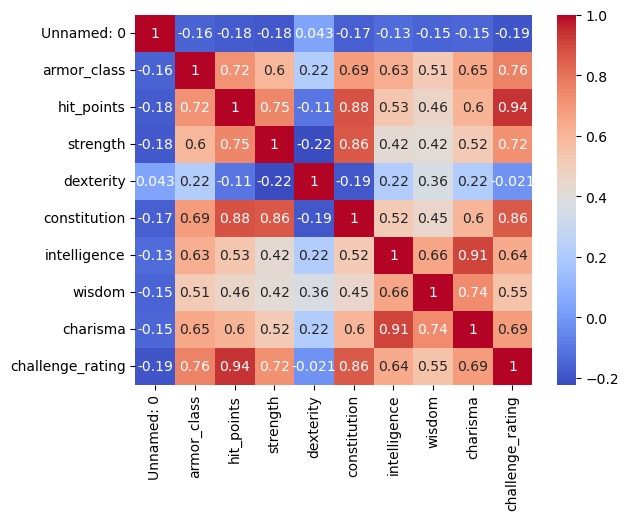

In [21]:
# Summary Statistics

#Check the data types of all columns to identify the non-numeric columns
print(df_cleaned.dtypes)

#Filter only numeric columns for correlation computation
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

#Compute the correlation matrix using only numeric columns
correlation_matrix = df_cleaned[numeric_cols].corr()

# Step 4: Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming df_cleaned is the DataFrame with numeric and non-numeric columns

# Step 1: Separate the numeric columns from non-numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Step 2: Normalize the numeric columns (MinMaxScaler)
scaler = MinMaxScaler()
df_normalized = df_cleaned.copy()  # Make a copy to preserve original data
df_normalized[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Step 3: Standardize the numeric columns (StandardScaler)
standardizer = StandardScaler()
df_standardized = df_cleaned.copy()  # Make a copy to preserve original data
df_standardized[numeric_cols] = standardizer.fit_transform(df_cleaned[numeric_cols])

# Optionally, you can merge the non-numeric columns back if necessary
# df_normalized[non_numeric_cols] = df_cleaned[non_numeric_cols]
# df_standardized[non_numeric_cols] = df_cleaned[non_numeric_cols]

# Step 4: Check the first few rows of the normalized and standardized data
print("Normalized Data:")
print(df_normalized.head())

print("\nStandardized Data:")
print(df_standardized.head())



Normalized Data:
   Unnamed: 0                       _id               index  \
0    0.000000  5f2329ad0b1bb138c59411ee             aboleth   
1    0.003115  5f2329ad0b1bb138c59411ef             acolyte   
2    0.006231  5f2329ad0b1bb138c59411f1  adult-black-dragon   
3    0.009346  5f2329ad0b1bb138c59411f0   adult-blue-dragon   
4    0.012461  5f2329ad0b1bb138c59411f2  adult-brass-dragon   

                 name    size        type   subtype      alignment  \
0             Aboleth   Large  aberration       NaN    lawful evil   
1             Acolyte  Medium    humanoid  any race  any alignment   
2  Adult Black Dragon    Huge      dragon       NaN   chaotic evil   
3   Adult Blue Dragon    Huge      dragon       NaN    lawful evil   
4  Adult Brass Dragon    Huge      dragon       NaN   chaotic good   

   armor_class  hit_points hit_dice  \
0         0.60    0.198519    18d10   
1         0.25    0.011852      2d8   
2         0.70    0.287407    17d12   
3         0.70    0.331852 

In [27]:
X = df_standardized.drop(columns=['challenge_rating'])  # Features
y = df_standardized['challenge_rating']  # Target variable

In [28]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (257, 31), Testing set shape: (65, 31)


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Ignore unknown categories
])

# Separate numeric and categorical columns
numeric_cols = df_standardized.select_dtypes(include=['number']).columns
categorical_cols = df_standardized.select_dtypes(exclude=['number']).columns

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Separate Features and Target Variable
X = df_standardized.drop(columns=['challenge_rating'])  # Features
y = df_standardized['challenge_rating']  # Target variable

# Create the model pipeline with preprocessing and regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



ValueError: A given column is not a column of the dataframe